<a href="https://colab.research.google.com/github/yewon68/project2/blob/main/AI_13_%EC%A0%95%EC%98%88%EC%9B%90_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction**


> 주어진 데이터로 뇌졸중 예측하기

데이터 출처 : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [3]:
#파일 업로드
from google.colab import files
uploaded = files.upload()

Saving stroke1.csv to stroke1.csv


In [ ]:
#데이터를 변수 stroke에 지정하고 확인
import pandas as pd
stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
print(stroke.shape)
stroke.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
!pip install pandas-profiling==3.1.0

ERROR: Operation cancelled by user


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(stroke)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#gender가 other인 행 1개 제거
stroke=stroke.loc[(stroke['gender']=='Female')|(stroke['gender']=='Male')]
stroke.shape

(5109, 12)

In [ ]:
#work_type 열 제거
stroke.drop(['work_type'],axis=1,inplace=True)
print(stroke.shape)
stroke.head()

(5109, 11)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [ ]:
#프로파일링에서도 알 수 있었지만, 이 데이터셋은 뇌졸중인 사람의 비율이 매우 적은 불균형 데이터라는 사실을 알 수 있다.
stroke['stroke'].value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

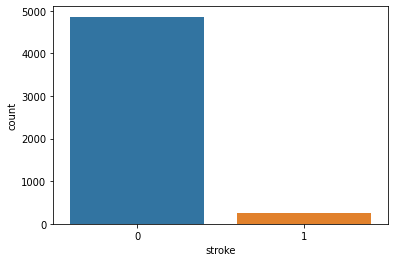

In [18]:
import seaborn as sns
sns.countplot(x='stroke', data=stroke1)

In [ ]:
#1차 전처리가 적용된 dataframe을 저장
stroke.to_csv('stroke1.csv')

In [4]:
#불러오기
import pandas as pd
stroke1=pd.read_csv('/content/stroke1.csv',index_col=0)

In [5]:
#불필요한 열 제거
stroke1.drop(['Residence_type','id'], axis=1, inplace=True)

In [6]:
#결측치 mean 값으로 처리
mean= stroke1['bmi'].mean()
stroke1['bmi'].fillna(value = mean, inplace = True) 

In [7]:
#나이 정수 처리
import numpy as np
stroke1['age'] = (stroke1['age'].apply(np.ceil)).astype('int64')

In [8]:
#correlation 확인
stroke1.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276458,0.263900,0.238411,0.325508,0.245379
hypertension,0.276458,1.000000,0.108292,0.174540,0.160151,0.127891
heart_disease,0.263900,0.108292,1.000000,0.161907,0.038865,0.134905
avg_glucose_level,0.238411,0.174540,0.161907,1.000000,0.168913,0.131991
bmi,0.325508,0.160151,0.038865,0.168913,1.000000,0.038917
stroke,0.245379,0.127891,0.134905,0.131991,0.038917,1.000000


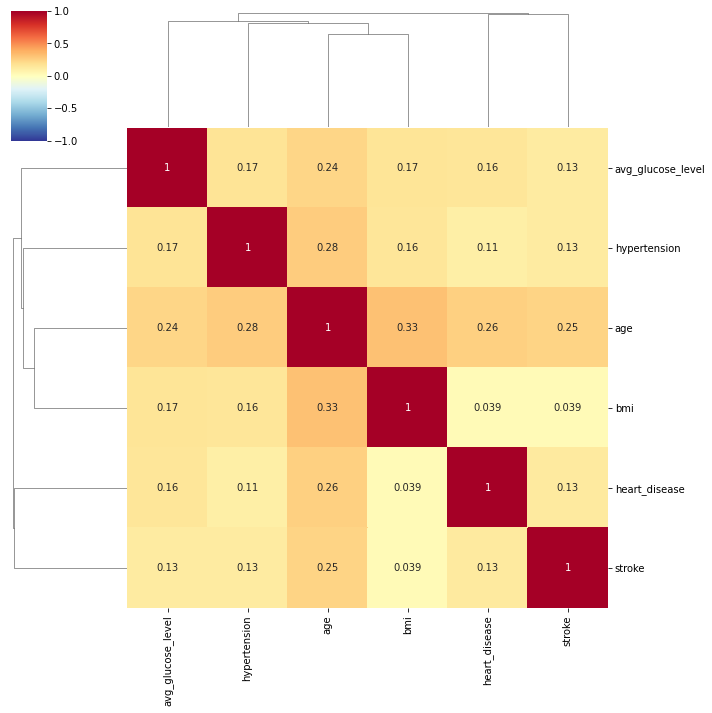

In [9]:
#corr 시각화
import seaborn as sns
df = stroke1.corr()

sns.clustermap(df, 
               annot = True,
               cmap = 'RdYlBu_r',
               vmin = -1, vmax = 1,
              )

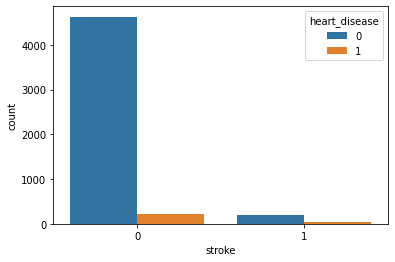

In [26]:
sns.countplot(x='stroke', hue='heart_disease', data=stroke1)

In [30]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 6.0 MB/s 


In [31]:
#onehotencoder, 2차 전처리 완료
from category_encoders import OneHotEncoder

enc = OneHotEncoder(cols = ['gender','ever_married','smoking_status'], use_cat_names = True)
stroke2 = enc.fit_transform(stroke1)
stroke2

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,gender_Male,gender_Female,age,hypertension,heart_disease,ever_married_Yes,ever_married_No,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_Unknown,stroke
0,1,0,67,0,1,1,0,228.69,36.60000,1,0,0,0,1
1,0,1,61,0,0,1,0,202.21,28.89456,0,1,0,0,1
2,1,0,80,0,1,1,0,105.92,32.50000,0,1,0,0,1
3,0,1,49,0,0,1,0,171.23,34.40000,0,0,1,0,1
4,0,1,79,1,0,1,0,174.12,24.00000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,80,1,0,1,0,83.75,28.89456,0,1,0,0,0
5106,0,1,81,0,0,1,0,125.20,40.00000,0,1,0,0,0
5107,0,1,35,0,0,1,0,82.99,30.60000,0,1,0,0,0
5108,1,0,51,0,0,1,0,166.29,25.60000,1,0,0,0,0


In [32]:
#train_test_split
from sklearn.model_selection import train_test_split
target='stroke'
train,test=train_test_split(stroke2,random_state=2,train_size=0.75)
train,val=train_test_split(train,test_size=len(test),stratify=train[target],random_state=2)
features=train.drop(columns=[target]).columns

In [33]:
train.shape, test.shape, val.shape

((2553, 14), (1278, 14), (1278, 14))

In [35]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [39]:
#RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)
clf.fit(X_train, y_train);
print('최적 하이퍼파라미터: ', clf.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.02506685030715139, 'randomforestclassifier__n_estimators': 212, 'simpleimputer__strategy': 'mean'}


In [40]:
#pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 

pipe = make_pipeline(
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=212, class_weight='balanced', random_state=2, n_jobs=-1,max_depth=20)
)

pipe.fit(X_train, y_train)

print('검증세트 정확도', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_test)

검증세트 정확도 0.9491392801251957


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


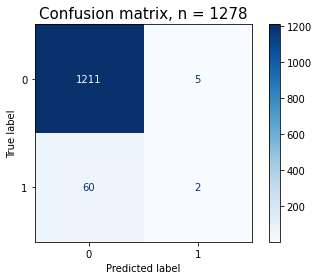

In [42]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()